In [14]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from keras.layers import BatchNormalization
from keras.layers import Dropout

In [35]:
data = yf.download('MSFT', start='2018-01-01', end='2024-03-31')

[*********************100%%**********************]  1 of 1 completed


In [36]:
df = data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_dataset = scaler.fit_transform(df)

In [37]:
def create_dataset(df, time_steps=1):
    x, y = [], []
    for i in range(len(df) - time_steps):
        data_steps = df[i:(i + time_steps), 0]
        x.append(data_steps)
        y.append(df[i + time_steps, 0])
    return np.array(x), np.array(y)

In [39]:
time_steps=10
x, y = create_dataset(scaled_dataset, time_steps)
x = np.reshape(x, (x.shape[0], x.shape[1], 1))

In [40]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [41]:
model.add(Dropout(0.2))
model.add(BatchNormalization())

In [42]:
model.compile(optimizer="adam",loss="mean_squared_error")

In [43]:
model.fit(x, y, epochs=50, batch_size=32)

Epoch 1/50
49/49 [==============================] - 5s 6ms/step - loss: 0.1788
Epoch 2/50
49/49 [==============================] - 0s 6ms/step - loss: 0.1297
Epoch 3/50
49/49 [==============================] - 0s 6ms/step - loss: 0.0994
Epoch 4/50
49/49 [==============================] - 0s 6ms/step - loss: 0.0751
Epoch 5/50
49/49 [==============================] - 0s 6ms/step - loss: 0.0595
Epoch 6/50
49/49 [==============================] - 0s 6ms/step - loss: 0.0479
Epoch 7/50
49/49 [==============================] - 0s 6ms/step - loss: 0.0392
Epoch 8/50
49/49 [==============================] - 0s 6ms/step - loss: 0.0332
Epoch 9/50
49/49 [==============================] - 0s 6ms/step - loss: 0.0279
Epoch 10/50
49/49 [==============================] - 0s 6ms/step - loss: 0.0231
Epoch 11/50
49/49 [==============================] - 0s 6ms/step - loss: 0.0209
Epoch 12/50
49/49 [==============================] - 0s 7ms/step - loss: 0.0207
Epoch 13/50
49/49 [==============================

In [44]:
test_data = yf.download('MSFT',start='2018-01-01', end='2024-03-31')['Close'].values.reshape(-1, 1)
scaled_test_data = scaler.transform(test_data)
x_test, y_test = create_dataset(scaled_test_data, time_steps)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_pred = model.predict(x_test)
y_pred = scaler.inverse_transform(y_pred)

[*********************100%%**********************]  1 of 1 completed


49/49 [==============================] - 1s 3ms/step


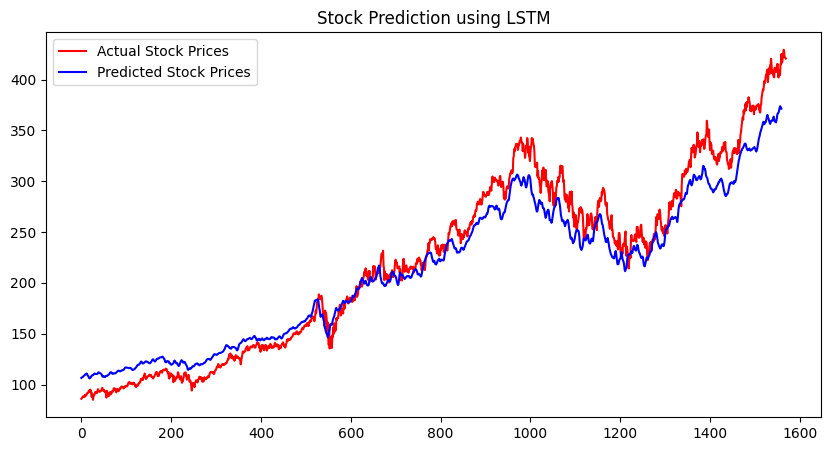

In [45]:
plt.figure(figsize=(10, 5))
plt.plot(test_data, label='Actual Stock Prices', color='red')
plt.plot(y_pred, label='Predicted Stock Prices', color='blue')
plt.title('Stock Prediction using LSTM')
plt.legend()
plt.show()